# Project 1

## Step 1: Load the data and perform basic operations.

##### 1. Load the data in using pandas.

In [239]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from pprint import pprint
%matplotlib inline
import scipy.stats as stats
import scipy.stats as stats
import seaborn as sns
import imp
sns.set_style('whitegrid')
%config InlineBackend.figure_format = 'retina'

In [2]:
act = pd.read_csv('../data/act.csv', sep=',')
sat = pd.read_csv('../data/sat.csv', sep=',')

##### 2. Print the first ten rows of each dataframe.

In [275]:
act.head(10)

,Unnamed: 0,State,Participation,English,Math,Reading,Science,Composite
0,0,National,0.60,20.3,20.7,21.4,21.0,21.0
1,1,Alabama,1.00,18.9,18.4,19.7,19.4,19.2
2,2,Alaska,0.65,18.7,19.8,20.4,19.9,19.8
3,3,Arizona,0.62,18.6,19.8,20.1,19.8,19.7
4,4,Arkansas,1.00,18.9,19.0,19.7,19.5,19.4
5,5,California,0.31,22.5,22.7,23.1,22.2,22.8
6,6,Colorado,1.00,20.1,20.3,21.2,20.9,20.8
7,7,Connecticut,0.31,25.5,24.6,25.6,24.6,25.2
8,8,Delaware,0.18,24.1,23.4,24.8,23.6,24.1
9,9,District of Columbia,0.32,24.4,23.5,24.9,23.5,24.2


In [4]:
sat.head(10)

,Unnamed: 0,State,Participation,Evidence-Based Reading and Writing,Math,Total
0,0,Alabama,5%,593,572,1165
1,1,Alaska,38%,547,533,1080
2,2,Arizona,30%,563,553,1116
3,3,Arkansas,3%,614,594,1208
4,4,California,53%,531,524,1055
5,5,Colorado,11%,606,595,1201
6,6,Connecticut,100%,530,512,1041
7,7,Delaware,100%,503,492,996
8,8,District of Columbia,100%,482,468,950
9,9,Florida,83%,520,497,1017


##### 3. Describe in words what each variable (column) is.

ACT:
State: Geographic location where test is taken	
Participation: % participation of student body	
English: Subject area score
Math: Subject area score
Reading: Subject area score
Science: Subject area score
Composite: Average of above ACT subject area score
SAT:
State: Geographic location where test is taken
Participation: % participation of student body
Evidence-Based Reading and Writing: Subject area score
Math: Subject area score
Total: Combined Subject Area SAT Scores

##### 4. Does the data look complete? Are there any obvious issues with the observations?

Appears to be complete values but perhaps several incorrect values for Maryland

##### 5. Print the types of each column.

In [5]:
sat.dtypes

Unnamed: 0                             int64
State                                 object
Participation                         object
Evidence-Based Reading and Writing     int64
Math                                   int64
Total                                  int64
dtype: object

In [6]:
act.dtypes

Unnamed: 0         int64
State             object
Participation     object
English          float64
Math             float64
Reading          float64
Science          float64
Composite        float64
dtype: object

##### 6. Do any types need to be reassigned? If so, go ahead and do it.

In [ ]:
# Yes, participation needs to be numeric(float)

In [7]:
act['Participation'] = act['Participation'].str.rstrip('%').astype(float) /100

In [8]:
sat['Participation'] = sat['Participation'].str.rstrip('%').astype(float) /100

##### 7. Create a dictionary for each column mapping the State to its respective value for that column. (For example, you should have three SAT dictionaries.)

In [299]:
sat_par = sat.set_index('State').to_dict()['Participation']

In [300]:
sat_evidence = sat.set_index('State').to_dict()['Evidence-Based Reading and Writing']

In [301]:
sat_math = sat.set_index('State').to_dict()['Math']

In [302]:
act_part = act.set_index('State').to_dict()['Participation']

In [303]:
act_english = act.set_index('State').to_dict()['English']

In [304]:
act_math = act.set_index('State').to_dict()['Math']

In [305]:
act_reading = act.set_index('State').to_dict()['Reading']

In [306]:
act_science = act.set_index('State').to_dict()['Science']

In [307]:
act_composite = act.set_index('State').to_dict()['Composite']

##### 8. Create one dictionary where each key is the column name, and each value is an iterable (a list or a Pandas Series) of all the values in that column.

In [276]:
sat_dic = {'State':[sat['State']],'Participation':[sat['Participation']],
           'Evidence-Based Reading and Writing':[sat['Evidence-Based Reading and Writing']],
           'Math':[sat['Math']],'Total':[sat['Total']]}

act_dic = {'State':[act['State']],'Participation':[act['Participation']],
           'English':[act['English']],'Math':[act['Math']],'Reading':[act['Reading']],
           'Science':[act['Science']],'Composite':[act['Composite']]}

##### 9. Merge the dataframes on the state column.

In [77]:
merged = act.merge(sat, how='inner', on='State')
merged.head()

,Unnamed: 0_x,State,Participation_x,English,Math_x,Reading,Science,Composite,Unnamed: 0_y,Participation_y,Evidence-Based Reading and Writing,Math_y,Total
0,1,Alabama,1.00,18.9,18.4,19.7,19.4,19.2,0,0.05,593,572,1165
1,2,Alaska,0.65,18.7,19.8,20.4,19.9,19.8,1,0.38,547,533,1080
2,3,Arizona,0.62,18.6,19.8,20.1,19.8,19.7,2,0.30,563,553,1116
3,4,Arkansas,1.00,18.9,19.0,19.7,19.5,19.4,3,0.03,614,594,1208
4,5,California,0.31,22.5,22.7,23.1,22.2,22.8,4,0.53,531,524,1055


##### 10. Change the names of the columns so you can distinguish between the SAT columns and the ACT columns.

In [327]:
# or use DataFrame.renamemerged_scores.columns = ['0','State','SAT Participation']
merged.columns = ['0', 'State', 'act_Participation', 'act_English', 'act_Math', 'act_Reading', 'act_Science', 'act_Composite', '0', 'sat_Participation', 'sat_ReadingWriting', 'sat_Math', 'sat_Total']
merged

,0,State,act_Participation,act_English,act_Math,act_Reading,act_Science,act_Composite,0,sat_Participation,sat_ReadingWriting,sat_Math,sat_Total
0,1,Alabama,1.00,18.9,18.4,19.7,19.4,19.2,0,0.05,593,572,1165
1,2,Alaska,0.65,18.7,19.8,20.4,19.9,19.8,1,0.38,547,533,1080
2,3,Arizona,0.62,18.6,19.8,20.1,19.8,19.7,2,0.30,563,553,1116
3,4,Arkansas,1.00,18.9,19.0,19.7,19.5,19.4,3,0.03,614,594,1208
4,5,California,0.31,22.5,22.7,23.1,22.2,22.8,4,0.53,531,524,1055
5,6,Colorado,1.00,20.1,20.3,21.2,20.9,20.8,5,0.11,606,595,1201
6,7,Connecticut,0.31,25.5,24.6,25.6,24.6,25.2,6,1.00,530,512,1041
7,8,Delaware,0.18,24.1,23.4,24.8,23.6,24.1,7,1.00,503,492,996
8,9,District of Columbia,0.32,24.4,23.5,24.9,23.5,24.2,8,1.00,482,468,950
9,10,Florida,0.73,19.0,19.4,21.0,19.4,19.8,9,0.83,520,497,1017


##### 11. Print the minimum and maximum of each numeric column in the data frame.

In [21]:
merged.describe()

,0,act_Participation,act_English,act_Math,act_Reading,act_Science,act_Composite,0,sat_Participation,sat_ReadingWriting,sat_Math,sat_Total
count,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000
mean,26.000000,0.652549,20.931373,21.182353,22.013725,21.041176,21.519608,25.000000,0.398039,569.117647,547.627451,1126.098039
std,14.866069,0.321408,2.353677,1.981989,2.067271,3.182463,2.020695,14.866069,0.352766,45.666901,84.909119,92.494812
min,1.000000,0.080000,16.300000,18.000000,18.100000,2.300000,17.800000,0.000000,0.020000,482.000000,52.000000,950.000000
25%,13.500000,0.310000,19.000000,19.400000,20.450000,19.900000,19.800000,12.500000,0.040000,533.500000,522.000000,1055.500000
50%,26.000000,0.690000,20.700000,20.900000,21.800000,21.300000,21.400000,25.000000,0.380000,559.000000,548.000000,1107.000000
75%,38.500000,1.000000,23.300000,23.100000,24.150000,22.750000,23.600000,37.500000,0.660000,613.000000,599.000000,1212.000000
max,51.000000,1.000000,25.500000,25.300000,26.000000,24.900000,25.500000,50.000000,1.000000,644.000000,651.000000,1295.000000


In [22]:
merged.max(),merged.min()

(0                          51
 State                 Wyoming
 act_Participation           1
 act_English              25.5
 act_Math                 25.3
 act_Reading                26
 act_Science              24.9
 act_Composite            25.5
 0                          50
 sat_Participation           1
 sat_ReadingWriting        644
 sat_Math                  651
 sat_Total                1295
 dtype: object, 0                           1
 State                 Alabama
 act_Participation        0.08
 act_English              16.3
 act_Math                   18
 act_Reading              18.1
 act_Science               2.3
 act_Composite            17.8
 0                           0
 sat_Participation        0.02
 sat_ReadingWriting        482
 sat_Math                   52
 sat_Total                 950
 dtype: object)

##### 12. Write a function using only list comprehensions, no loops, to compute standard deviation. Using this function, calculate the standard deviation of each numeric column in both data sets. Add these to a list called `sd`.

$$\sigma = \sqrt{\frac{1}{n}\sum_{i=1}^n(x_i - \mu)^2}$$

In [34]:
numerged = merged.select_dtypes(include=['float64', 'int64'])
#numerged.head()
sd = [np.std(numerged[name], ddof=1) for name in numerged.columns]
sd

[0    14.866069
 0    14.866069
 dtype: float64,
 0.32140842015886834,
 2.35367713980303,
 1.9819894936505533,
 2.0672706264873146,
 3.182462975155452,
 2.020694891154341,
 0    14.866069
 0    14.866069
 dtype: float64,
 0.35276632270013036,
 45.66690138768932,
 84.90911865855486,
 92.49481172519046]

## Step 2: Manipulate the dataframe

##### 13. Turn the list `sd` into a new observation in your dataset.

In [44]:
numerged.loc['sd', :] = sd
numerged.head

<bound method NDFrame.head of             0  act_Participation  act_English   act_Math  act_Reading  \
0    1.000000           1.000000    18.900000  18.400000    19.700000   
1    2.000000           0.650000    18.700000  19.800000    20.400000   
2    3.000000           0.620000    18.600000  19.800000    20.100000   
3    4.000000           1.000000    18.900000  19.000000    19.700000   
4    5.000000           0.310000    22.500000  22.700000    23.100000   
5    6.000000           1.000000    20.100000  20.300000    21.200000   
6    7.000000           0.310000    25.500000  24.600000    25.600000   
7    8.000000           0.180000    24.100000  23.400000    24.800000   
8    9.000000           0.320000    24.400000  23.500000    24.900000   
9   10.000000           0.730000    19.000000  19.400000    21.000000   
10  11.000000           0.550000    21.000000  20.900000    22.000000   
11  12.000000           0.900000    17.800000  19.200000    19.200000   
12  13.000000        

##### 14. Sort the dataframe by the values in a numeric column (e.g. observations descending by SAT participation rate)

In [37]:
numerged.sort_values('act_English', ascending=False).head()

,0,act_Participation,act_English,act_Math,act_Reading,act_Science,act_Composite,0,sat_Participation,sat_ReadingWriting,sat_Math,sat_Total
6,7.0,0.31,25.5,24.6,25.6,24.6,25.2,6.0,1.00,530.0,512.0,1041.0
29,30.0,0.18,25.4,25.1,26.0,24.9,25.5,29.0,0.96,532.0,520.0,1052.0
21,22.0,0.29,25.4,25.3,25.9,24.7,25.4,21.0,0.76,555.0,551.0,1107.0
8,9.0,0.32,24.4,23.5,24.9,23.5,24.2,8.0,1.00,482.0,468.0,950.0
19,20.0,0.08,24.2,24.0,24.8,23.7,24.3,19.0,0.95,513.0,499.0,1012.0


##### 15. Use a boolean filter to display only observations with a score above a certain threshold (e.g. only states with a participation rate above 50%)

In [286]:
numerged[(numerged.act_Participation >= .5)].head(50).sort_values('act_Participation', ascending=False).head()

,0,act_Participation,act_English,act_Math,act_Reading,act_Science,act_Composite,0,sat_Participation,sat_ReadingWriting,sat_Math,sat_Total
0,1.0,1.0,18.9,18.4,19.7,19.4,19.2,0.0,0.05,593.0,572.0,1165.0
18,19.0,1.0,19.4,18.8,19.8,19.6,19.5,18.0,0.04,611.0,586.0,1198.0
49,50.0,1.0,19.7,20.4,20.6,20.9,20.5,49.0,0.03,642.0,649.0,1291.0
44,45.0,1.0,19.5,19.9,20.8,20.6,20.3,44.0,0.03,624.0,614.0,1238.0
42,43.0,1.0,19.5,19.2,20.1,19.9,19.8,42.0,0.05,623.0,604.0,1228.0


## Step 3: Visualize the data

##### 16. Using MatPlotLib and PyPlot, plot the distribution of the Rate columns for both SAT and ACT using histograms. (You should have two histograms. You might find [this link](https://matplotlib.org/users/pyplot_tutorial.html#working-with-multiple-figures-and-axes) helpful in organizing one plot above the other.) 

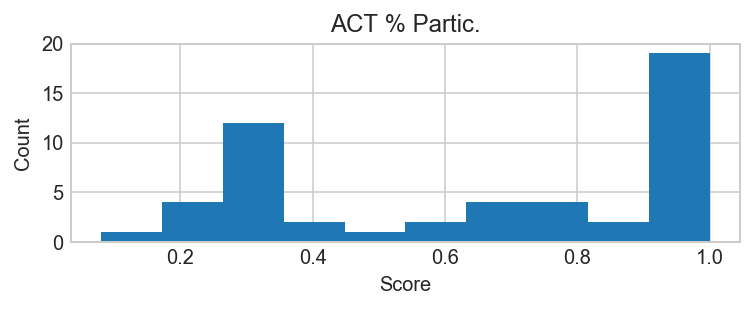

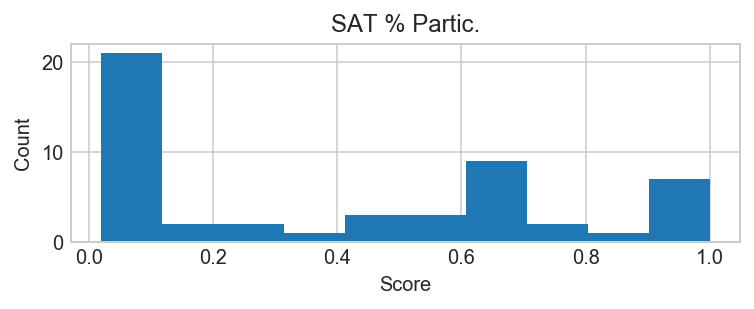

In [291]:
plt.figure(1)
plt.subplot(211)
plt.hist(merged.act_Participation)
plt.title('ACT % Partic.')
plt.xlabel("Score")
plt.ylabel("Count")
plt.show()


plt.figure(2)
plt.subplot(212)
plt.hist(merged.sat_Participation)
plt.title('SAT % Partic.')
plt.xlabel("Score")
plt.ylabel("Count")
plt.show()


##### 17. Plot the Math(s) distributions from both data sets.

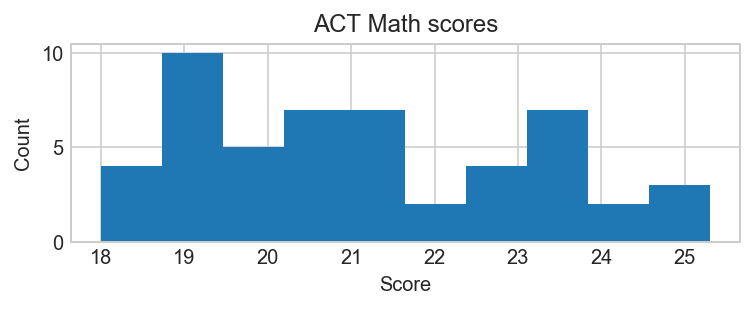

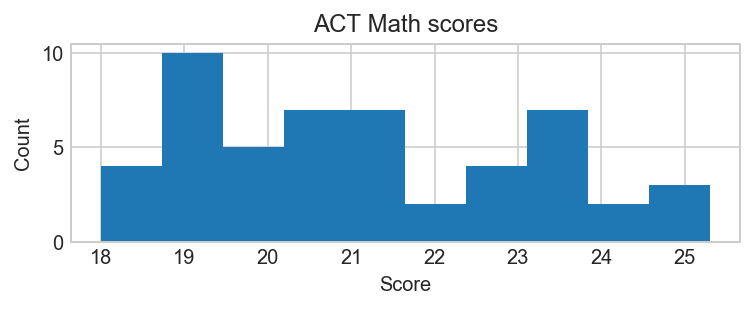

In [293]:
plt.figure(1)
plt.subplot(211)
plt.hist(merged.act_Math)
plt.title('ACT Math scores')
plt.xlabel("Score")
plt.ylabel("Count")
plt.show()

plt.figure(1)
plt.subplot(211)
plt.hist(merged.act_Math)
plt.title('ACT Math scores')
plt.xlabel("Score")
plt.ylabel("Count")
plt.show()


##### 18. Plot the Verbal distributions from both data sets.

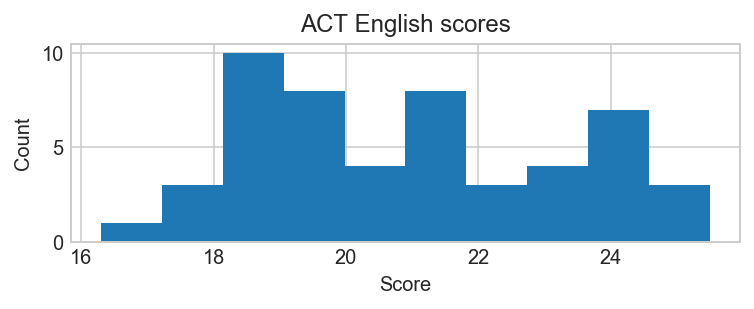

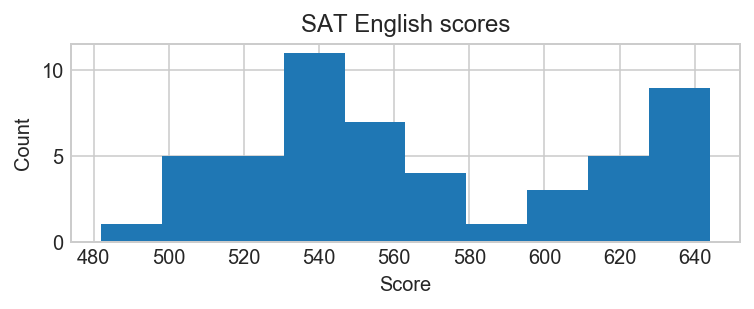

In [294]:
plt.figure(1)
plt.subplot(211)
plt.hist(merged.act_English)
plt.title('ACT English scores')
plt.xlabel("Score")
plt.ylabel("Count")
plt.show()

plt.figure(1)
plt.subplot(211)
plt.hist(merged.sat_ReadingWriting)
plt.title('SAT English scores')
plt.xlabel("Score")
plt.ylabel("Count")
plt.show()


##### 19. When we make assumptions about how data are distributed, what is the most common assumption?

In [ ]:
Normal Distribution

##### 20. Does this assumption hold true for any of our columns? Which?

In [295]:
merged.describe()

,0,act_Participation,act_English,act_Math,act_Reading,act_Science,act_Composite,0,sat_Participation,sat_ReadingWriting,sat_Math,sat_Total
count,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000
mean,26.000000,0.652549,20.931373,21.182353,22.013725,21.041176,21.519608,25.000000,0.398039,569.117647,547.627451,1126.098039
std,14.866069,0.321408,2.353677,1.981989,2.067271,3.182463,2.020695,14.866069,0.352766,45.666901,84.909119,92.494812
min,1.000000,0.080000,16.300000,18.000000,18.100000,2.300000,17.800000,0.000000,0.020000,482.000000,52.000000,950.000000
25%,13.500000,0.310000,19.000000,19.400000,20.450000,19.900000,19.800000,12.500000,0.040000,533.500000,522.000000,1055.500000
50%,26.000000,0.690000,20.700000,20.900000,21.800000,21.300000,21.400000,25.000000,0.380000,559.000000,548.000000,1107.000000
75%,38.500000,1.000000,23.300000,23.100000,24.150000,22.750000,23.600000,37.500000,0.660000,613.000000,599.000000,1212.000000
max,51.000000,1.000000,25.500000,25.300000,26.000000,24.900000,25.500000,50.000000,1.000000,644.000000,651.000000,1295.000000


In [ ]:
#The distributions in this data set do not follow a standard dist

##### 21. Plot some scatterplots examining relationships between all variables.

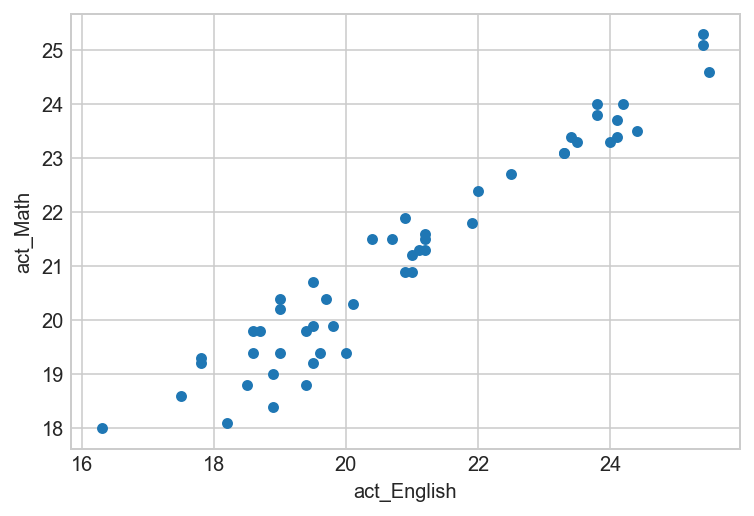

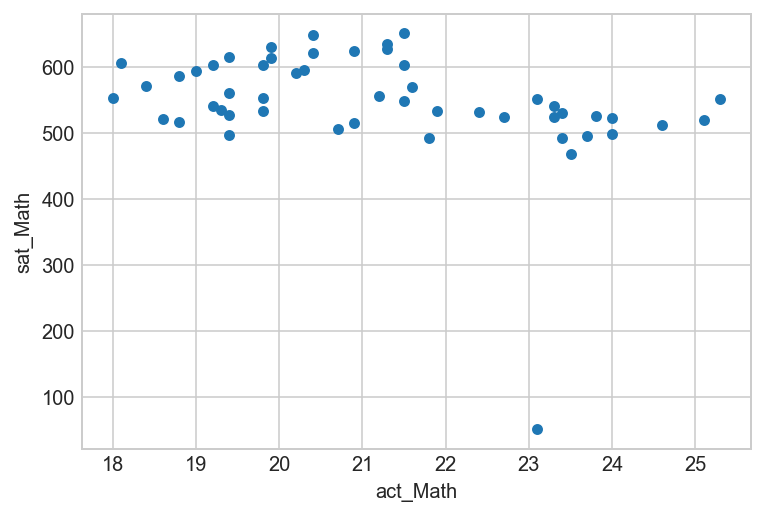

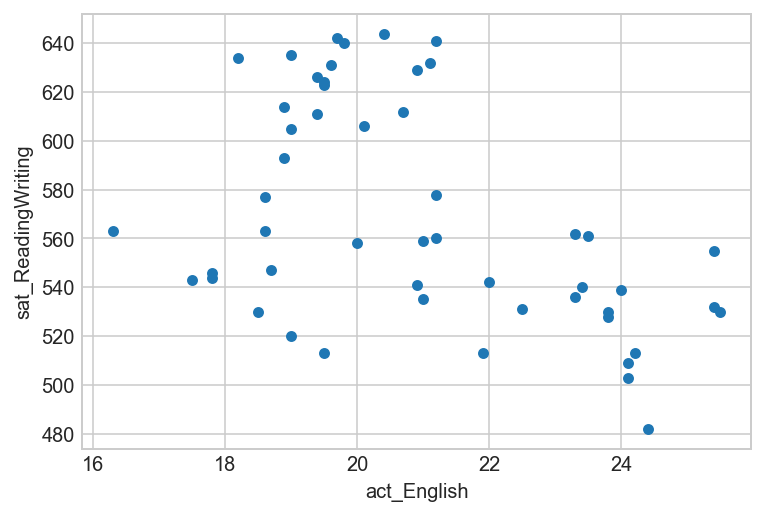

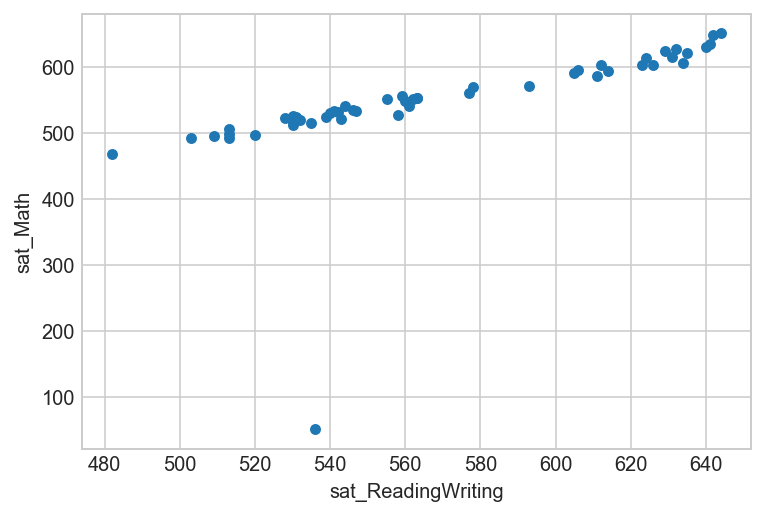

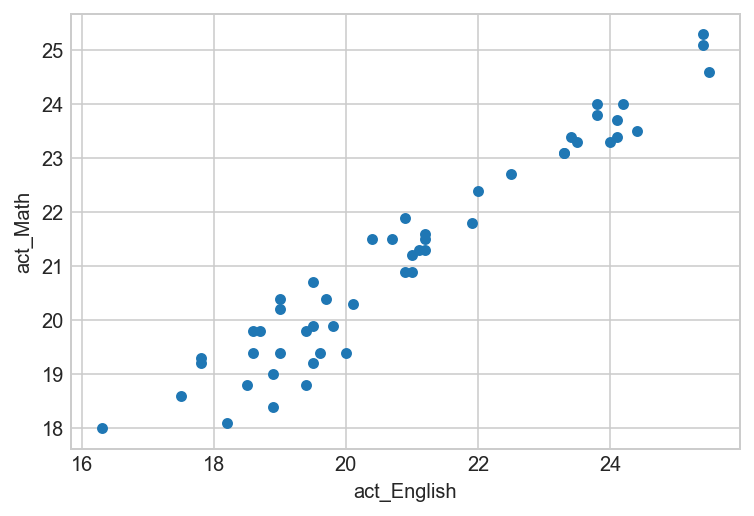

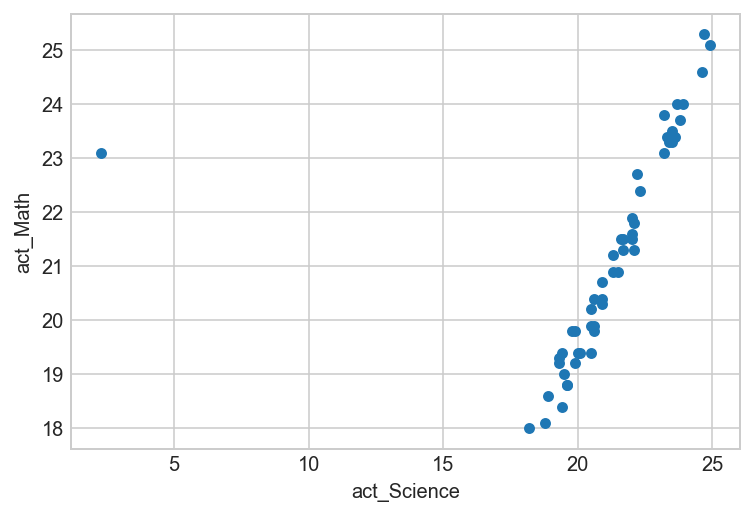

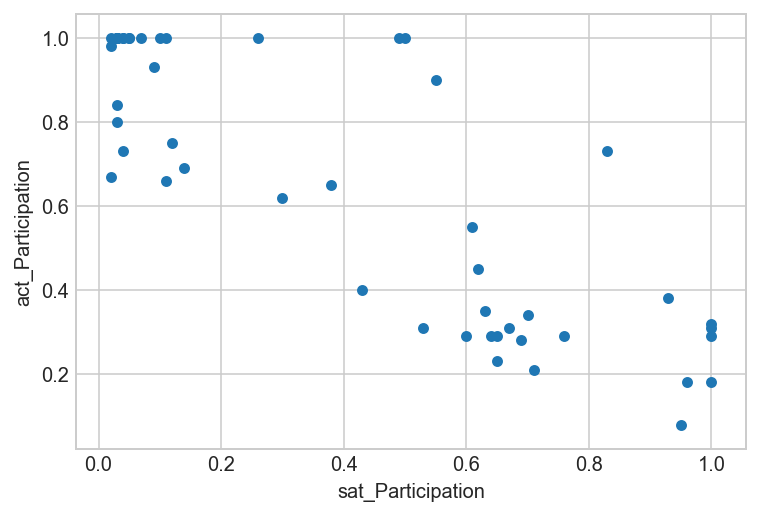

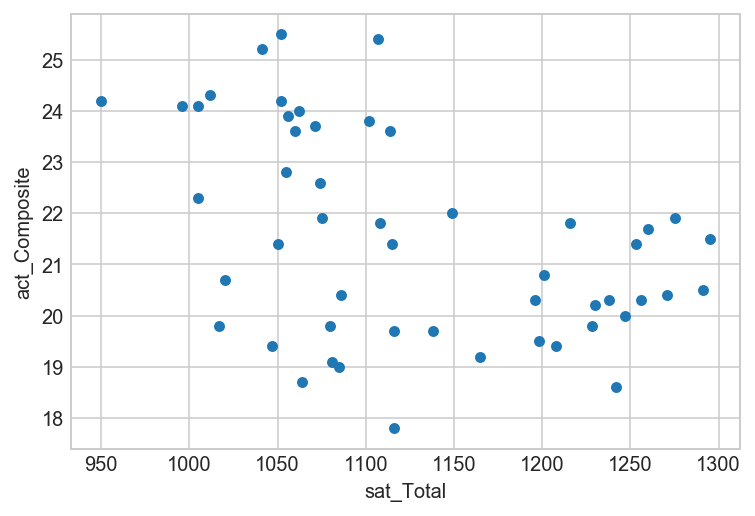

In [331]:
merged.plot.scatter('act_English', 'act_Math', s=None, c=None)
merged.plot.scatter('act_Math', 'sat_Math', s=None, c=None)
merged.plot.scatter('act_English', 'sat_ReadingWriting', s=None, c=None)
merged.plot.scatter('sat_ReadingWriting', 'sat_Math', s=None, c=None)

merged.plot.scatter('act_English', 'act_Math', s=None, c=None)
merged.plot.scatter('act_Science', 'act_Math', s=None, c=None)
merged.plot.scatter('sat_Participation', 'act_Participation', s=None, c=None)
merged.plot.scatter('sat_Total', 'act_Composite', s=None, c=None)


##### 22. Are there any interesting relationships to note?

1. There is a relationship between high and low performance across categories (ie. success in one subject area tends to translate into success in others.  However the relationship is stronger between math and science within a test type (act/sat) than between them.  In other words performing well in math act predicted science act scores better than math sat score.

2. There is also appears to be a relationship between act composite scores and sat totals.  However this relatipnship is not as strong as I would have expected

3. As SAT participation rises,  ACT participation drops.  This is surprising,  but there are some good explanations that can be inferred, such as a state clearly favoring one test over another or requiring one and not another

##### 23. Create box plots for each variable. 

{'boxes': [<matplotlib.lines.Line2D at 0x2867c585c88>],
 'caps': [<matplotlib.lines.Line2D at 0x2867b929128>,
 'fliers': [<matplotlib.lines.Line2D at 0x2867c6740f0>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x2867b929080>],
 'whiskers': [<matplotlib.lines.Line2D at 0x2867c5854a8>,
  <matplotlib.lines.Line2D at 0x2867c585240>]}

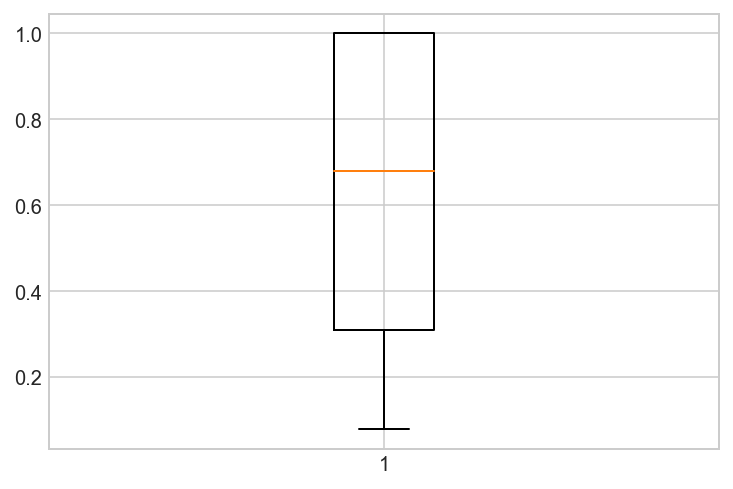

In [316]:
plt.boxplot(act.Participation)

{'boxes': [<matplotlib.lines.Line2D at 0x2867cc04f98>],
 'caps': [<matplotlib.lines.Line2D at 0x2867cc3a828>,
 'fliers': [<matplotlib.lines.Line2D at 0x2867cfde240>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x2867d019898>],
 'whiskers': [<matplotlib.lines.Line2D at 0x2867cc04240>,
  <matplotlib.lines.Line2D at 0x2867cc3a5f8>]}

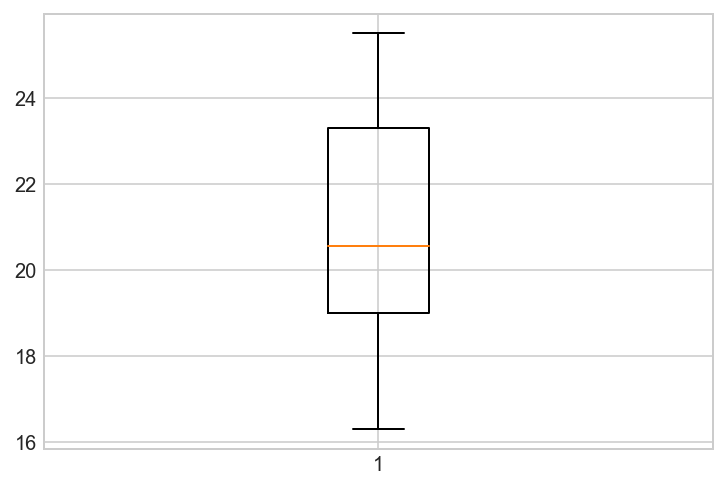

In [318]:
plt.boxplot(act.English)

{'boxes': [<matplotlib.lines.Line2D at 0x2867cada860>],
 'caps': [<matplotlib.lines.Line2D at 0x2867cadad68>,
 'fliers': [<matplotlib.lines.Line2D at 0x2867a5cddd8>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x2867a5cdac8>],
 'whiskers': [<matplotlib.lines.Line2D at 0x2867cadaef0>,
  <matplotlib.lines.Line2D at 0x2867cada198>]}

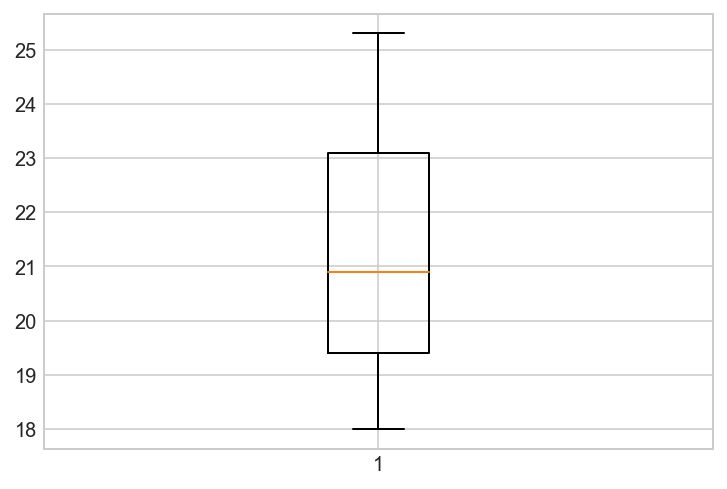

In [319]:
plt.boxplot(act.Math)

{'boxes': [<matplotlib.lines.Line2D at 0x2867b7be518>],
 'caps': [<matplotlib.lines.Line2D at 0x2867b7be978>,
 'fliers': [<matplotlib.lines.Line2D at 0x2867c5ae0b8>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x2867c5aebe0>],
 'whiskers': [<matplotlib.lines.Line2D at 0x2867b7be550>,
  <matplotlib.lines.Line2D at 0x2867b7be3c8>]}

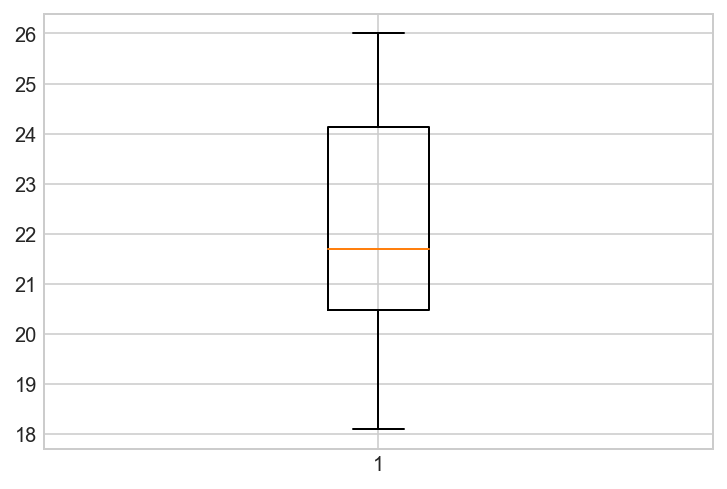

In [320]:
plt.boxplot(act.Reading)

{'boxes': [<matplotlib.lines.Line2D at 0x2867c68b2b0>],
 'caps': [<matplotlib.lines.Line2D at 0x2867cf11a58>,
 'fliers': [<matplotlib.lines.Line2D at 0x2867cef27f0>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x2867cef2ef0>],
 'whiskers': [<matplotlib.lines.Line2D at 0x2867c68b0f0>,
  <matplotlib.lines.Line2D at 0x2867cf11da0>]}

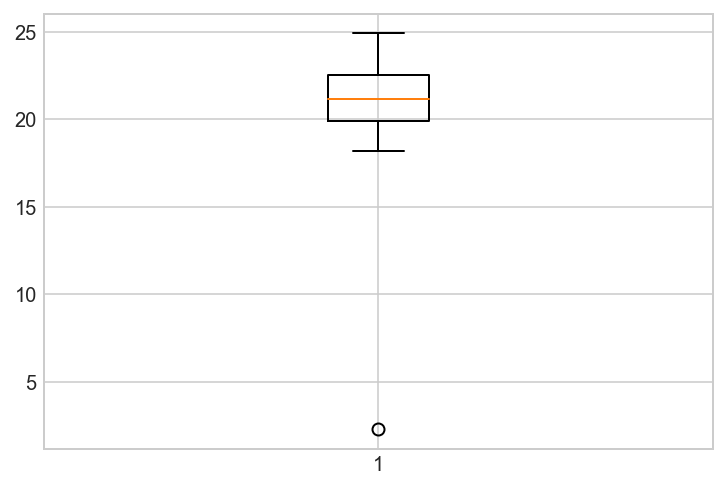

In [321]:
plt.boxplot(act.Science)

{'boxes': [<matplotlib.lines.Line2D at 0x2867c9cbc88>],
 'caps': [<matplotlib.lines.Line2D at 0x2867c994898>,
 'fliers': [<matplotlib.lines.Line2D at 0x2867cf076a0>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x2867cf07208>],
 'whiskers': [<matplotlib.lines.Line2D at 0x2867c9cbe48>,
  <matplotlib.lines.Line2D at 0x2867c994400>]}

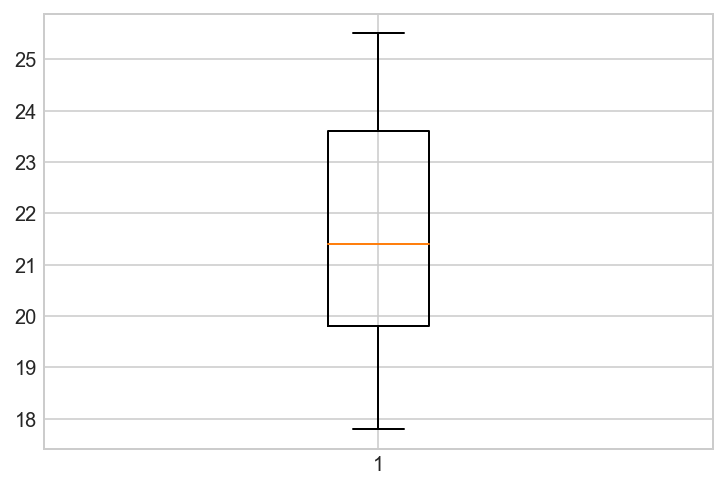

In [322]:
plt.boxplot(act.Composite)

{'boxes': [<matplotlib.lines.Line2D at 0x286003fc4a8>],
 'caps': [<matplotlib.lines.Line2D at 0x286004030b8>,
 'fliers': [<matplotlib.lines.Line2D at 0x28600403e80>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x286004039e8>],
 'whiskers': [<matplotlib.lines.Line2D at 0x286003fc668>,
  <matplotlib.lines.Line2D at 0x286003fcbe0>]}

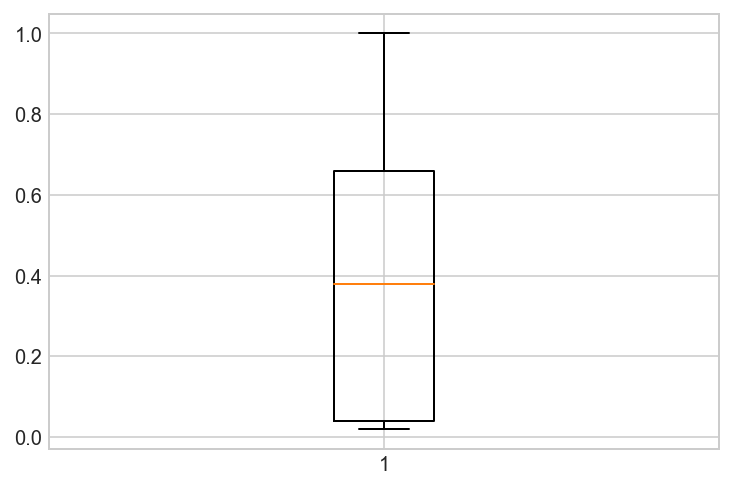

In [323]:
plt.boxplot(sat.Participation)

{'boxes': [<matplotlib.lines.Line2D at 0x286005c70b8>],
 'caps': [<matplotlib.lines.Line2D at 0x286005c7c88>,
 'fliers': [<matplotlib.lines.Line2D at 0x286005cda90>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x286005cd5f8>],
 'whiskers': [<matplotlib.lines.Line2D at 0x286005c7278>,
  <matplotlib.lines.Line2D at 0x286005c77f0>]}

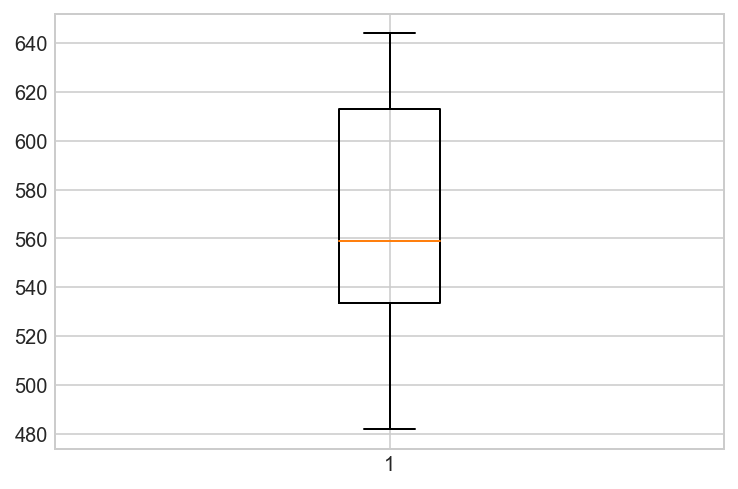

In [324]:
plt.boxplot(sat['Evidence-Based Reading and Writing'])

{'boxes': [<matplotlib.lines.Line2D at 0x286007c4e10>],
 'caps': [<matplotlib.lines.Line2D at 0x286007d0a20>,
 'fliers': [<matplotlib.lines.Line2D at 0x286007d6828>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x286007d6390>],
 'whiskers': [<matplotlib.lines.Line2D at 0x286007c4fd0>,
  <matplotlib.lines.Line2D at 0x286007d0588>]}

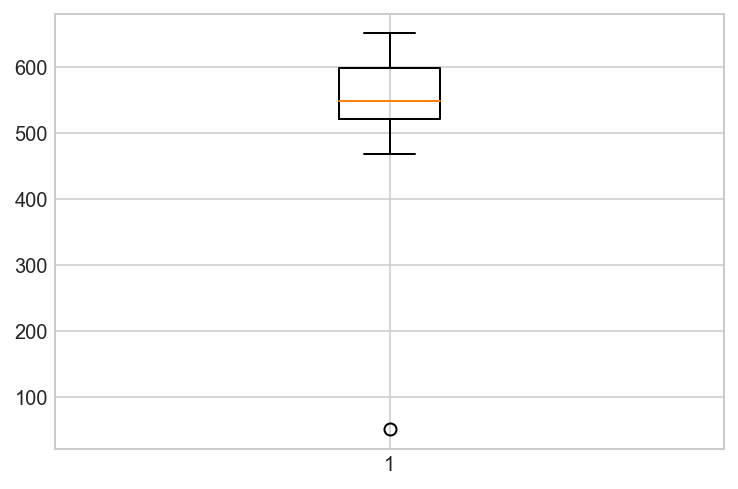

In [325]:
plt.boxplot(sat.Math)

{'boxes': [<matplotlib.lines.Line2D at 0x28600828ac8>],
 'caps': [<matplotlib.lines.Line2D at 0x286008316d8>,
 'fliers': [<matplotlib.lines.Line2D at 0x2860083a4e0>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x2860083a048>],
 'whiskers': [<matplotlib.lines.Line2D at 0x28600828c88>,
  <matplotlib.lines.Line2D at 0x28600831240>]}

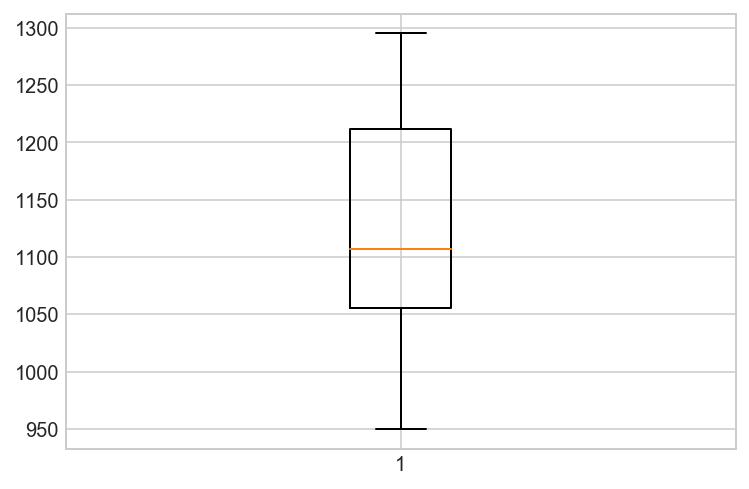

In [326]:
plt.boxplot(sat.Total)

##### BONUS: Using Tableau, create a heat map for each variable using a map of the US. 

## Step 4: Descriptive and Inferential Statistics

##### 24. Summarize each distribution. As data scientists, be sure to back up these summaries with statistics. (Hint: What are the three things we care about when describing distributions?)

In [221]:
merged.describe()

,0,act_Participation,act_English,act_Math,act_Reading,act_Science,act_Composite,0,sat_Participation,sat_ReadingWriting,sat_Math,sat_Total
count,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000
mean,26.000000,0.652549,20.931373,21.182353,22.013725,21.041176,21.519608,25.000000,0.398039,569.117647,547.627451,1126.098039
std,14.866069,0.321408,2.353677,1.981989,2.067271,3.182463,2.020695,14.866069,0.352766,45.666901,84.909119,92.494812
min,1.000000,0.080000,16.300000,18.000000,18.100000,2.300000,17.800000,0.000000,0.020000,482.000000,52.000000,950.000000
25%,13.500000,0.310000,19.000000,19.400000,20.450000,19.900000,19.800000,12.500000,0.040000,533.500000,522.000000,1055.500000
50%,26.000000,0.690000,20.700000,20.900000,21.800000,21.300000,21.400000,25.000000,0.380000,559.000000,548.000000,1107.000000
75%,38.500000,1.000000,23.300000,23.100000,24.150000,22.750000,23.600000,37.500000,0.660000,613.000000,599.000000,1212.000000
max,51.000000,1.000000,25.500000,25.300000,26.000000,24.900000,25.500000,50.000000,1.000000,644.000000,651.000000,1295.000000


Median 0.38
Mean 0.39803921568627454
Mode 0    0.03
dtype: float64
Std 0.35276632270013036
AxesSubplot(0.125,0.125;0.775x0.755)


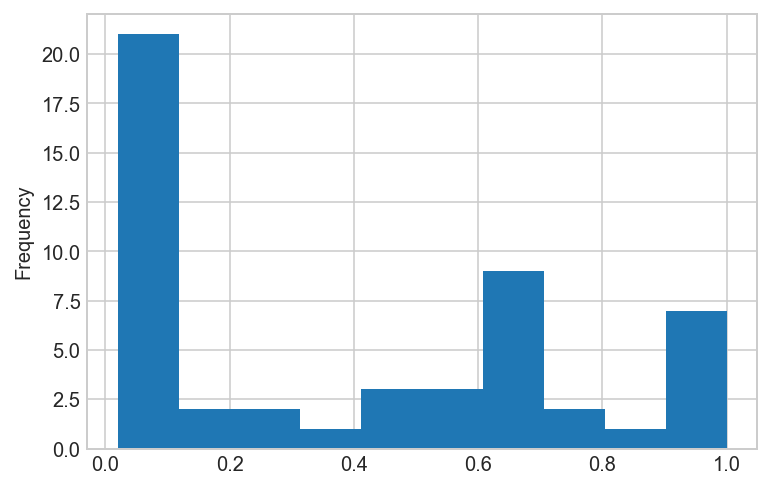

In [220]:


print('Median', merged.sat_Participation.median())
print('Mean', merged.sat_Participation.mean())
print('Mode', merged.sat_Participation.mode())
print('Std', merged.sat_Participation.std())
print(merged.sat_Participation.plot.hist())



##### 25. Summarize each relationship. Be sure to back up these summaries with statistics.

In [ ]:
#choose what you want to compare,  describe the ones in #16
#as scores in one subject go up,  the go up in another
#as participation goes up,  scores go down

##### 26. Execute a hypothesis test comparing the SAT and ACT participation rates. Use $\alpha = 0.05$. Be sure to interpret your results.

In [247]:
# HYPOTHESIS TEST:
# Ho: mu ACT participation == mu SAT participation
# Ha: mu ACT participation != mu SAT participation

stats.ttest_ind(merged.sat_Participation,merged.act_Participation)

# reject the null because the p value is lower than .05 (alpha).  
# Therefore the ACT participation is not equal to the SAT participation
# the -3.8 denotes that they are nearly 4 standard deviations away.
# in other words the participations vary to a large degree in the relationship
# between each other

Ttest_indResult(statistic=-3.8085778908170544, pvalue=0.00024134203698662353)

##### 27. Generate and interpret 95% confidence intervals for SAT and ACT participation rates.

In [253]:
#[point estimate]±[multiplier]×[standard error]
#[mean]=-[1.96]X[stderror]
print(merged.sat_Participation.mean())
stats.t.interval(0.95,
                 len(merged.sat_Participation) - 1,
                 loc = np.mean(merged.sat_Participation),
                 scale = np.std(merged.sat_Participation,  ddof = 1))#ddof will always be 1 (setting degrees of freedom

0.39803921568627454


(-0.31051279537380627, 1.1065912267463553)

In [251]:
stats.t.interval(0.95,
                 len(merged.act_Participation) - 1,
                 loc = np.mean(merged.act_Participation),
                 scale = np.std(merged.act_Participation,  ddof = 1))#ddof will always be 1 (setting degrees of freedom)

(0.0069812093585757129, 1.2981168298571104)

In [ ]:
# There was a large degreee of variablity between within each
# The range to acheive 95% confidence,  due to the large variability
# is outside the possible values. While this seems illogical it is 
# simply an indicator that we can have very little confidence predicting 
# a given states'participation at the 95% level

##### 28. Given your answer to 26, was your answer to 27 surprising? Why?

In [ ]:
# This was expected in that we see very different confidence intervals

##### 29. Is it appropriate to generate correlation between SAT and ACT math scores? Why?

In [ ]:
# Its appropriate to generate a correlation in order to see 
# if there is a relation per state you'd want to know that and then seek an explanation
# in this case there isn't a correlation, which is good to know
# and could lead to a conclusion like: "If sat is required its all students
# whereas the act isn't required and then only sample college ready students

In [256]:
stats.ttest_ind(merged.sat_Math,merged.act_Math)

Ttest_indResult(statistic=44.26551854301654, pvalue=1.6750567328477293e-67)

In [267]:
merged[['State','act_Math',  'sat_Math']].sort_values('act_Math')

,State,act_Math,sat_Math
28,Nevada,18.0,553
24,Mississippi,18.1,607
0,Alabama,18.4,572
40,South Carolina,18.6,521
36,Oklahoma,18.8,517
18,Louisiana,18.8,586
3,Arkansas,19.0,594
42,Tennessee,19.2,604
11,Hawaii,19.2,541
33,North Carolina,19.3,535


##### 30. Suppose we only seek to understand the relationship between SAT and ACT data in 2017. Does it make sense to conduct statistical inference given the data we have? Why?

In [ ]:
#Yes it makes sense but might require the assumption that data changes little
#between each year.  You may want to lookn at the variance bwteen other years to
#detirmine if this is the case